最小化函数
minimize 函数

In [1]:
from numpy import *
from matplotlib.pyplot import *
set_printoptions(precision=3, suppress=True)

已知斜抛运动的水平飞行距离公式：

$d=2\frac{v_0^2}{g}sin(\theta)cos(\theta)$

- $d$ 水平飞行距离
- $v_0$ 初速度大小
- $g$ 重力加速度
- $\theta$ 抛出角度

希望找到使得$d$最大的角度$\theta$

定义距离函数:

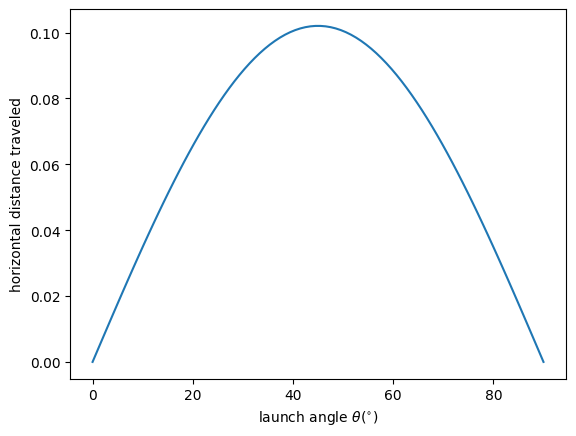

In [2]:
def dist(theta, v0):
    """calculate the distance travelled by a projectile launched
 at theta degrees with v0 (m/s) initial velocity.
 """
    g = 9.8
    theta_rad = pi * theta / 180
    return 2 * v0 ** 2 / g * sin(theta_rad) * cos(theta_rad)
theta = linspace(0,90,90)
p = plot(theta, dist(theta, 1.))
xl = xlabel(r'launch angle $\theta (^{\circ})$')
yl = ylabel('horizontal distance traveled')

因为 `Scipy` 提供的是最小化方法，所以最大化距离就相当于最小化距离的负数：

In [3]:
def neg_dist(theta, v0):
    return -1 * dist(theta, v0)

导入 `scipy.optimize.minimize`：

In [4]:
from scipy.optimize import minimize
result = minimize(neg_dist, 40, args=(1,))
print("optimal angle = {:.1f} degrees".format(result.x[0]))

optimal angle = 45.0 degrees


`minimize` 接受三个参数：第一个是要优化的函数，第二个是初始猜测值，第三个则是优化函数的附加参数，默认 `minimize` 将优化函数的第一个参数作为优化变量，所以第三个参数输入的附加参数从优化函数的第二个参数开始。

查看返回结果：

In [5]:
print(result)

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: -0.10204080670440296
        x: [ 4.501e+01]
      nit: 3
      jac: [ 1.548e-06]
 hess_inv: [[ 8.095e+03]]
     nfev: 18
     njev: 9


### Rosenbrock 函数

Rosenbrock 函数是一个用来测试优化函数效果的一个非凸函数：

$$f(x)=\sum_{i=1}^{N-1}100(x_{i+1}^{2}-x_{i})+(1-x_{i})^{2}$$

导入该函数:

In [6]:
from scipy.optimize import rosen
from mpl_toolkits.mplot3d import Axes3D

使用 `N = 2` 的 Rosenbrock 函数：

In [7]:
x, y = meshgrid(np.linspace(-2,2,25), np.linspace(-0.5,3.5,25))
z = rosen([x,y])

图像和最低点 `(1,1)`：

C:\Users\86183\AppData\Local\Temp\ipykernel_2360\2993152945.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection="3d")


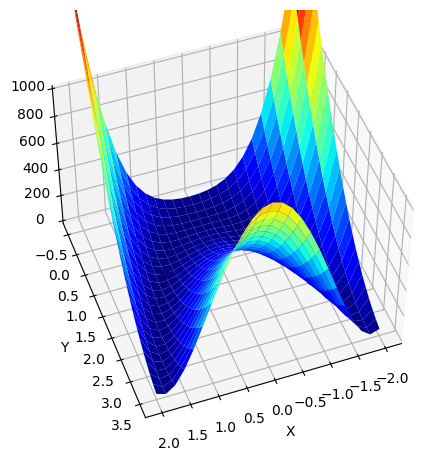

In [8]:
fig = figure(figsize=(12,5.5))
ax = fig.gca(projection="3d")
ax.azim = 70; ax.elev = 48
ax.set_xlabel("X"); ax.set_ylabel("Y")
ax.set_zlim((0,1000))
p = ax.plot_surface(x,y,z,rstride=1, cstride=1, cmap=cm.jet)
rosen_min = ax.plot([1],[1],[0],"ro")

传入初始值：

In [9]:
x0 = [1.3, 1.6, -0.5, -1.8, 0.8]
result = minimize(rosen, x0)
print(result.x)

[-0.962  0.936  0.881  0.778  0.605]


随机给定初始值：

In [10]:
x0 = np.random.randn(10)
result = minimize(rosen, x0)
print(x0)
print(result.x)

[-1.23   0.113 -0.874 -0.694 -0.137  0.361  0.208  1.396 -1.911  0.137]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


对于 `N > 3`，函数的最小值为$(x_1, x_2, \cdots, x_N)=(1, 1, \cdots, 1) $
不过有一个局部极小值点$(x_1, x_2, \cdots, x_N)=(-1, 1, \cdots, 1) $

所以随机初始值如果选的不好的话，有可能返回的结果是局部极小值点：

##优化方法
### BFGS 算法

`minimize` 函数默认根据问题是否有界或者有约束，使用 `'BFGS', 'L-BFGS-B', 'SLSQP'` 中的一种。

可以查看帮助来得到更多的信息：

In [11]:
info(minimize)

 minimize(fun, x0, args=(), method=None, jac=None, hess=None, hessp=None,
          bounds=None, constraints=(), tol=None, callback=None, options=None)

Minimization of scalar function of one or more variables.

Parameters
----------
fun : callable
    The objective function to be minimized.

        ``fun(x, *args) -> float``

    where ``x`` is a 1-D array with shape (n,) and ``args``
    is a tuple of the fixed parameters needed to completely
    specify the function.
x0 : ndarray, shape (n,)
    Initial guess. Array of real elements of size (n,),
    where ``n`` is the number of independent variables.
args : tuple, optional
    Extra arguments passed to the objective function and its
    derivatives (`fun`, `jac` and `hess` functions).
method : str or callable, optional
    Type of solver.  Should be one of

        - 'Nelder-Mead' :ref:`(see here) <optimize.minimize-neldermead>`
        - 'Powell'      :ref:`(see here) <optimize.minimize-powell>`
        - 'CG'          :ref:`(see

默认没有约束时，使用的是 [BFGS](https://en.wikipedia.org/wiki/Broyden%E2%80%93Fletcher%E2%80%93Goldfarb%E2%80%93Shanno_algorithm) 方法。

利用 `callback` 参数查看迭代的历史：

In [12]:
x0 = [-1.5, 4.5]
xi = [x0]
result = minimize(rosen, x0, callback=xi.append)
xi = np.asarray(xi)
print(xi.shape)
print(result.x)
print("in {} function evaluations.".format(result.nfev))

(48, 2)
[1. 1.]
in 189 function evaluations.


绘图显示轨迹：

C:\Users\86183\AppData\Local\Temp\ipykernel_2360\288288307.py:4: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection="3d"); ax.azim = 70; ax.elev = 75


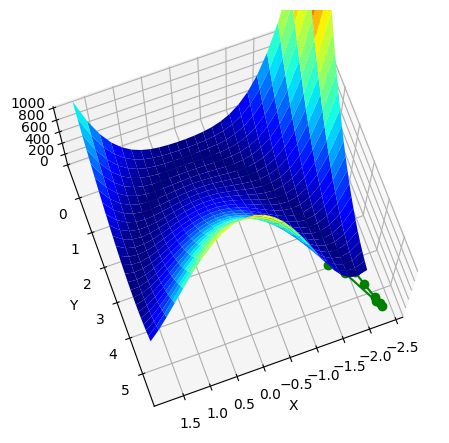

In [13]:
x, y = meshgrid(np.linspace(-2.3,1.75,25), np.linspace(-0.5,4.5,25))
z = rosen([x,y])
fig = figure(figsize=(12,5.5))
ax = fig.gca(projection="3d"); ax.azim = 70; ax.elev = 75
ax.set_xlabel("X"); ax.set_ylabel("Y"); ax.set_zlim((0,1000))
p = ax.plot_surface(x,y,z,rstride=1, cstride=1, cmap=cm.jet)
intermed = ax.plot(xi[:,0], xi[:,1], rosen(xi.T), "g-o")
rosen_min = ax.plot([1],[1],[0],"ro")

BFGS 需要计算函数的 Jacobian 矩阵:

给定$\begin{bmatrix} y_1, y_2, y_3 \end{bmatrix} = f(x_0, x_1, x_2)$

$
J=\begin{bmatrix}
\frac{\partial y_1}{\partial x_0}&\frac{\partial y_1}{\partial x_1}&\frac{\partial y_1}{\partial x_2}\\
\frac{\partial y_2}{\partial x_0}&\frac{\partial y_2}{\partial x_1}&\frac{\partial y_2}{\partial x_2}\\
\frac{\partial y_3}{\partial x_0}&\frac{\partial y_3}{\partial x_1}&\frac{\partial y_3}{\partial x_2}\\
\end{bmatrix}
$

在我们的例子中

$
J=\begin{bmatrix}
\frac{\partial rosen}{\partial x_0}&\frac{\partial rosen}{\partial x_1}\\
\end{bmatrix}
$

导入 `rosen` 函数的 `Jacobian` 函数 `rosen_der`：

In [14]:
from scipy.optimize import rosen_der

此时，我们将 `Jacobian` 矩阵作为参数传入：

In [15]:
xi = [x0]
result = minimize(rosen, x0, jac=rosen_der, callback=xi.append)
xi = np.asarray(xi)
print(xi.shape)
print("in {} function evaluations and {} jacobian evaluations.".format(result.nfev, result.njev))

(48, 2)
in 62 function evaluations and 62 jacobian evaluations.


可以看到，函数计算的开销大约减少了一半，迭代路径与上面的基本吻合：

C:\Users\86183\AppData\Local\Temp\ipykernel_2360\288288307.py:4: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection="3d"); ax.azim = 70; ax.elev = 75


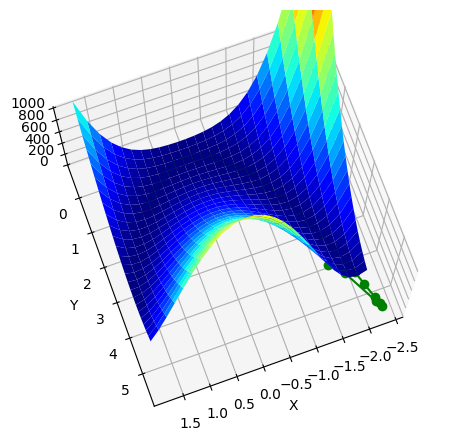

In [16]:
x, y = meshgrid(np.linspace(-2.3,1.75,25), np.linspace(-0.5,4.5,25))
z = rosen([x,y])
fig = figure(figsize=(12,5.5))
ax = fig.gca(projection="3d"); ax.azim = 70; ax.elev = 75
ax.set_xlabel("X"); ax.set_ylabel("Y"); ax.set_zlim((0,1000))
p = ax.plot_surface(x,y,z,rstride=1, cstride=1, cmap=cm.jet)
intermed = ax.plot(xi[:,0], xi[:,1], rosen(xi.T), "g-o")
rosen_min = ax.plot([1],[1],[0],"ro")

### Nelder-Mead Simplex 算法

改变 `minimize` 使用的算法，使用 [Nelder–Mead 单纯形算法](https://en.wikipedia.org/wiki/Nelder%E2%80%93Mead_method)：

In [17]:
xi = [x0]
result = minimize(rosen, x0, method="nelder-mead", callback = xi.append)
xi = np.asarray(xi)
print(xi.shape)
print("Solved the Nelder-Mead Simplex method with {} function evaluations.".format(result.nfev))

(121, 2)
Solved the Nelder-Mead Simplex method with 226 function evaluations.


C:\Users\86183\AppData\Local\Temp\ipykernel_2360\1758060947.py:4: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection="3d"); ax.azim = 70; ax.elev = 75


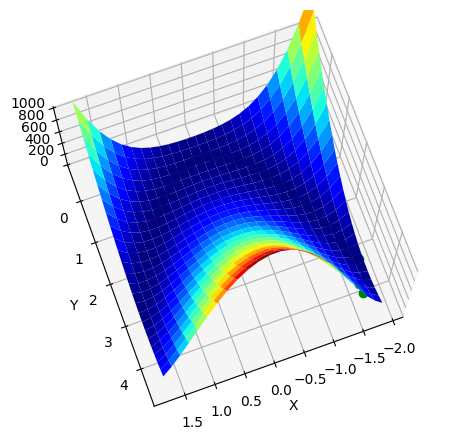

In [18]:
x, y = meshgrid(np.linspace(-1.9,1.75,25), np.linspace(-0.5,4.5,25))
z = rosen([x,y])
fig = figure(figsize=(12,5.5))
ax = fig.gca(projection="3d"); ax.azim = 70; ax.elev = 75
ax.set_xlabel("X"); ax.set_ylabel("Y"); ax.set_zlim((0,1000))
p = ax.plot_surface(x,y,z,rstride=1, cstride=1, cmap=cm.jet)
intermed = ax.plot(xi[:,0], xi[:,1], rosen(xi.T), "g-o")
rosen_min = ax.plot([1],[1],[0],"ro")

### Powell 算法

使用 [Powell](https://en.wikipedia.org/wiki/Powell%27s_method) 算法

In [19]:
xi = [x0]
result = minimize(rosen, x0, method="powell", callback=xi.append)
xi = np.asarray(xi)
print(xi.shape)
print("Solved Powell's method with {} function evaluations.".format(result.nfev))

(31, 2)
Solved Powell's method with 781 function evaluations.


C:\Users\86183\AppData\Local\Temp\ipykernel_2360\288288307.py:4: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection="3d"); ax.azim = 70; ax.elev = 75


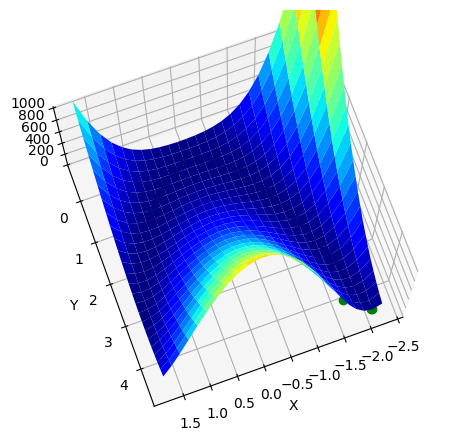

In [20]:
x, y = meshgrid(np.linspace(-2.3,1.75,25), np.linspace(-0.5,4.5,25))
z = rosen([x,y])
fig = figure(figsize=(12,5.5))
ax = fig.gca(projection="3d"); ax.azim = 70; ax.elev = 75
ax.set_xlabel("X"); ax.set_ylabel("Y"); ax.set_zlim((0,1000))
p = ax.plot_surface(x,y,z,rstride=1, cstride=1, cmap=cm.jet)
intermed = ax.plot(xi[:,0], xi[:,1], rosen(xi.T), "g-o")
rosen_min = ax.plot([1],[1],[0],"ro")